In [168]:
# 1st part of the problem is to predict the primary fuel. Its a classification problem

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_squared_error
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings("ignore")

In [170]:
#lets read the csv file
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
#lets convert the csv file to dataframe

Power=pd.DataFrame(data=df)
Power

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
Power1=Power.drop(["country","country_long","name","gppd_idnr","other_fuel1","other_fuel2","other_fuel3","generation_gwh_2013","commissioning_year","owner","url","wepp_id","year_of_capacity_data","generation_data_source","estimated_generation_gwh"],axis=1)

In [173]:
Power1

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,CDM,WRI,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,Wind,CDM,WRI,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN


In [174]:
Power1.shape
#it has 908 rows and 11 columns

(908, 10)

In [175]:
Power1.dtypes
#the data types are float and object type

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [176]:
#lets search for missing values if any

Power1.isnull().sum()
#Latitude,Longitude,geolocation_source, generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
#lets treat these missing values

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
source                   0
geolocation_source      19
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

In [177]:
Power1["latitude"]=Power1.latitude.fillna(Power1["latitude"].mean())

In [178]:
Power1["longitude"]=Power1.longitude.fillna(Power1["longitude"].median())

In [179]:
Power1["geolocation_source"]=Power1.geolocation_source.fillna(Power1["geolocation_source"].mode()[0])

In [180]:
Power1["generation_gwh_2014"]=Power1.generation_gwh_2014.fillna(Power1["generation_gwh_2014"].median())

In [181]:
Power1["generation_gwh_2015"]=Power1.generation_gwh_2015.fillna(Power1["generation_gwh_2015"].median())

In [182]:
Power1["generation_gwh_2016"]=Power1.generation_gwh_2016.fillna(Power1["generation_gwh_2016"].median())

In [183]:
Power1["generation_gwh_2017"]=Power1.generation_gwh_2017.fillna(Power1["generation_gwh_2017"].median())

In [184]:
#lets check if missing values have been treated or not

Power1.isnull().sum()
#it seems that they have been treated

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

<AxesSubplot:>

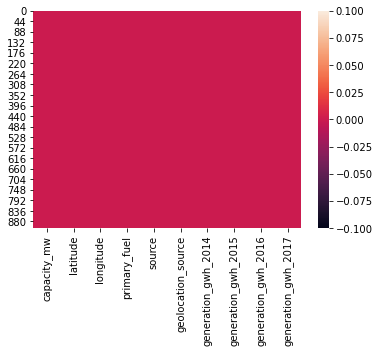

In [185]:
#lets confirm using heatmap that there are no more missing values
sns.heatmap(Power1.isnull())
#this confirms that there are no further missing values

In [186]:
Power1.describe()
#there is some skewness expected in most attributes as there is a difference between the mean and the median value
#the standard deviation is the most in generation_gwh_2017 and hence the spread of the data would be the most there
#outliers are expected to be there as the difference between the 75th percentile and maximum value is present. The most difference is found in generation_gwh_2017

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,1518.830440,1502.838018,1552.807503,1648.790766
std,580.221767,6.088110,4.783873,2783.474774,2985.277178,3006.880849,3047.577626
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,805.760000,701.027250,716.728350,807.601700
50%,60.000000,21.278850,76.719250,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.183775,79.211600,805.760000,701.027250,716.728350,807.601700
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000


In [187]:
le1=LabelEncoder()
Power1["primary_fuel"]=le1.fit_transform(Power1["primary_fuel"])
print(Power1["primary_fuel"].value_counts())
#Coal is the most used fuel for power generation

1    259
3    250
6    127
7    123
2     69
0     50
5     21
4      9
Name: primary_fuel, dtype: int64


In [188]:
le2=LabelEncoder()
Power1["source"]=le2.fit_transform(Power1["source"])
print(Power1["source"].value_counts())

22     520
21     124
84      10
109      8
110      6
      ... 
118      1
117      1
114      1
113      1
0        1
Name: source, Length: 191, dtype: int64


In [189]:
le3=LabelEncoder()
Power1["geolocation_source"]=le3.fit_transform(Power1["geolocation_source"])
print(Power1["geolocation_source"].value_counts())
#WRI is the most in number for geolocation source and the least is National Renewable Energy Laboratory 

2    785
0    119
1      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

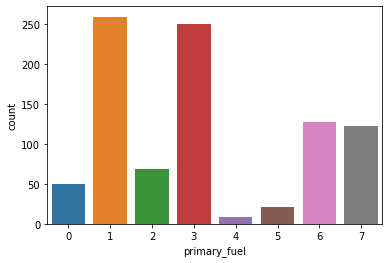

In [190]:
#lets perform analysis

sns.countplot(Power1["primary_fuel"])
#we need to balance the data which we will do using SMOTE below

<AxesSubplot:xlabel='capacity_mw'>

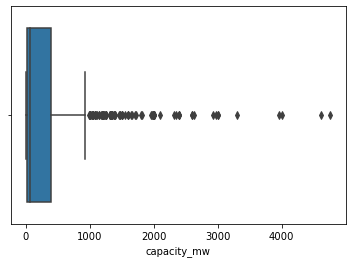

In [191]:
#lets perform analysis
sns.boxplot(Power1["capacity_mw"])
#outliers are present

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

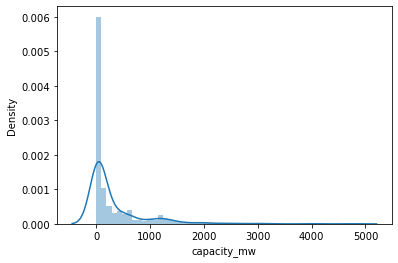

In [192]:
sns.distplot(Power1["capacity_mw"])
#skewness is present to the right

<AxesSubplot:xlabel='latitude'>

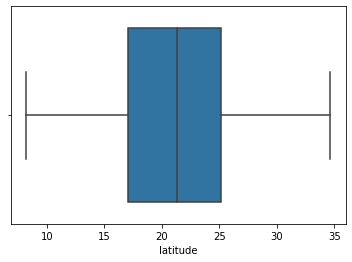

In [193]:
sns.boxplot(Power1["latitude"])
#no outliers are present
#minimum value is 8.1. Median value is 21.2 and maximum value is 34.6

<AxesSubplot:xlabel='latitude', ylabel='Density'>

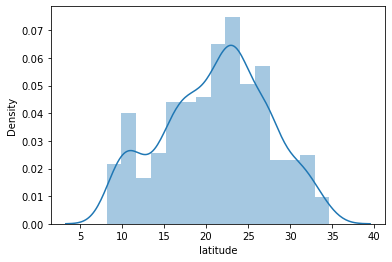

In [194]:
sns.distplot(Power["latitude"])
# maximum density is present between 20 to 28
#no skewness is present

<AxesSubplot:xlabel='longitude'>

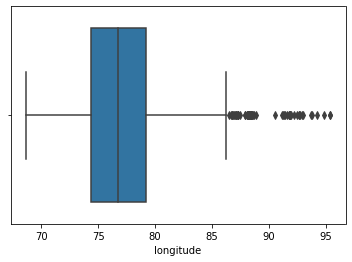

In [195]:
sns.boxplot(Power1["longitude"])
#outliers are present
#minimum value is 68.6. Median value is 76.7 and maximum value is 95.4

<AxesSubplot:xlabel='longitude', ylabel='Density'>

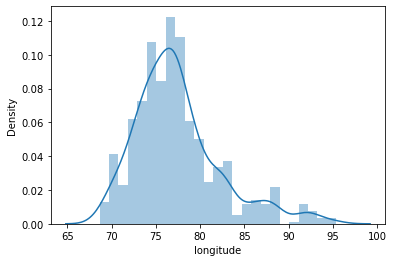

In [196]:
sns.distplot(Power["longitude"])
# maximum density is present between 72.5 to 80
# skewness is present to the right

In [197]:
Power1["source"].value_counts()

22     520
21     124
84      10
109      8
110      6
      ... 
118      1
117      1
114      1
113      1
0        1
Name: source, Length: 191, dtype: int64

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

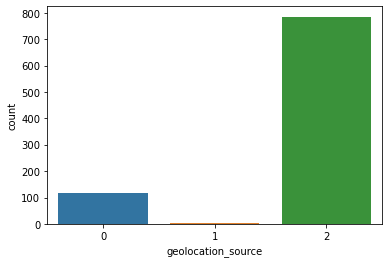

In [198]:
sns.countplot(Power1["geolocation_source"])
#WRI is the most occuring geolocation source

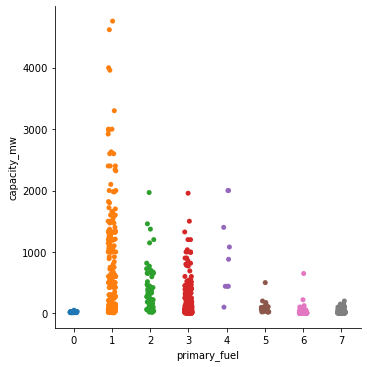

In [199]:
sns.catplot(x="primary_fuel",y="capacity_mw",kind="strip",data=Power1)
#Coal is the most used primary fuel having highest capacity 

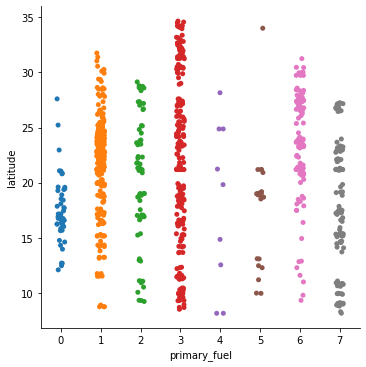

In [200]:
sns.catplot(x="primary_fuel",y="latitude",kind="strip",data=Power1)
#the range for primary fuel 3 is use the most across latitude

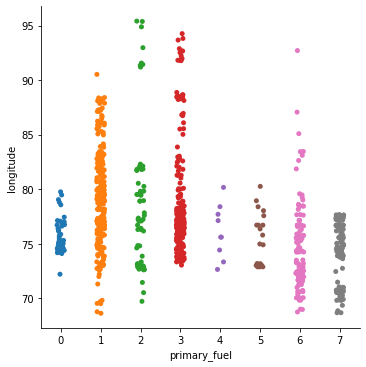

In [201]:
sns.catplot(x="primary_fuel",y="longitude",kind="strip",data=Power1)
#the range for primary fuel 1 is use the most across longitude

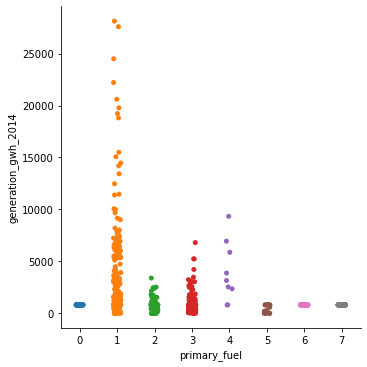

In [202]:
sns.catplot(x="primary_fuel",y="generation_gwh_2014",kind="strip",data=Power1)
#generation in terms of gwh is the most with coal in the year 2014

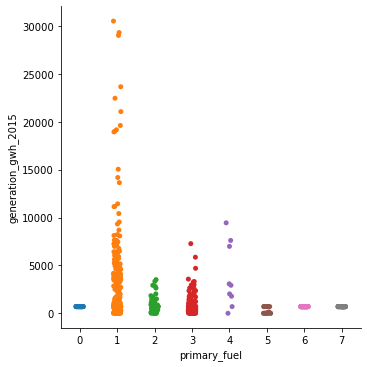

In [203]:
sns.catplot(x="primary_fuel",y="generation_gwh_2015",kind="strip",data=Power1)
#generation in terms of gwh is the most with coal in the year 2015

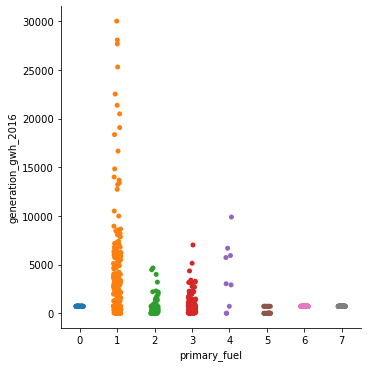

In [204]:
sns.catplot(x="primary_fuel",y="generation_gwh_2016",kind="strip",data=Power1)
#generation in terms of gwh is the most with coal in the year 2016

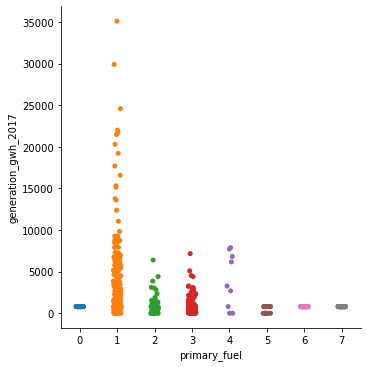

In [205]:
sns.catplot(x="primary_fuel",y="generation_gwh_2017",kind="strip",data=Power1)
#generation in terms of gwh is the most with coal in the year 2017

In [206]:
#lets check for the skewness
Power1.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.471141
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
dtype: float64

In [207]:
#lets treat the skewness for generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,

In [208]:
Power1["generation_gwh_2014"]=power_transform(Power1["generation_gwh_2014"].values.reshape(-1,1))

In [209]:
Power1["generation_gwh_2015"]=power_transform(Power1["generation_gwh_2015"].values.reshape(-1,1))

In [210]:
Power1["generation_gwh_2016"]=power_transform(Power1["generation_gwh_2016"].values.reshape(-1,1))

In [211]:
Power1["generation_gwh_2017"]=power_transform(Power1["generation_gwh_2017"].values.reshape(-1,1))

In [212]:
#lets check for skewness again
Power1.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              1.150963
primary_fuel           0.471141
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2014    0.286606
generation_gwh_2015    0.220431
generation_gwh_2016    0.201832
generation_gwh_2017    0.194047
dtype: float64

In [213]:
#before using machine learning lets train, test and split the data
x=Power1.drop("primary_fuel",axis=1)
x

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,109,1,-0.045486,-0.053637,-0.054984,-0.038673
1,98.0,24.7663,74.6090,174,2,-0.045486,-0.053637,-0.054984,-0.038673
2,39.2,21.9038,69.3732,21,2,-0.045486,-0.053637,-0.054984,-0.038673
3,135.0,23.8712,91.3602,22,2,-0.246450,0.081323,0.097738,-0.175277
4,1800.0,21.9603,82.4091,22,2,1.151206,1.837256,1.845609,1.623273
...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,22,2,-0.045486,-2.561939,-0.764834,0.010848
904,3.0,12.8932,78.1654,77,0,-0.045486,-0.053637,-0.054984,-0.038673
905,25.5,15.2758,75.5811,21,2,-0.045486,-0.053637,-0.054984,-0.038673
906,80.0,24.3500,73.7477,59,2,-0.045486,-0.053637,-0.054984,-0.038673


In [214]:
y=Power1["primary_fuel"]
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [215]:
smt=SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)

In [216]:
print(xtrain.value_counts())
print(ytrain.value_counts())

capacity_mw  latitude   longitude  source  geolocation_source  generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  generation_gwh_2017
22.500000    21.196189  76.719250  21      2                   -0.045486            -0.053637            -0.054984            -0.038673              3
9.000000     21.196189  76.719250  22      2                   -0.045486            -0.053637            -0.054984            -0.038673              2
6.600000     21.196189  76.719250  22      2                   -0.045486            -0.053637            -0.054984            -0.038673              2
50.000000    21.196189  76.719250  109     2                   -0.045486            -0.053637            -0.054984            -0.038673              2
5.000000     21.196189  76.719250  22      2                   -0.045486            -0.053637            -0.054984            -0.038673              2
                                                                                                   

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

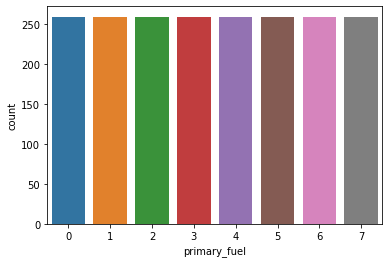

In [217]:
sns.countplot(ytrain)

In [218]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1450, 9)
(622, 9)
(1450,)
(622,)


#Now lets use four ML algos to select the best fit model:
1)SVC
2)KNN
3)Randomforest
4)Adaboost

In [219]:
svm=SVC()
svm.fit(x_train,y_train)
#lets predict y values
pred1=svm.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(svm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.3987138263665595
[[ 0  0  0  0  0  0 57 19]
 [ 0 11  8  0 41  6 12  4]
 [ 0  0 29  0 14 11  9  9]
 [ 0  0  9  0  5 19  0 48]
 [ 0  0 19  0 61  5  0  0]
 [ 0  0  4  0  0 30 21 26]
 [ 0  0  1  0  2  3 46 14]
 [ 0  0  0  0  0  8  0 71]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       1.00      0.13      0.24        82
           2       0.41      0.40      0.41        72
           3       0.00      0.00      0.00        81
           4       0.50      0.72      0.59        85
           5       0.37      0.37      0.37        81
           6       0.32      0.70      0.44        66
           7       0.37      0.90      0.53        79

    accuracy                           0.40       622
   macro avg       0.37      0.40      0.32       622
weighted avg       0.38      0.40      0.32       622

[0.5        0.48351648 0.51648352 0.51933702 0.51933702]
0.5077348066298342
0.01408628328077836


In [220]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.6881028938906752
[[73  2  1  2  0  3  8  0]
 [ 0 45  6  4 10  1  2  0]
 [ 0  9 43 12 13  8  3  3]
 [ 0  5  9 40  5 10  1  9]
 [ 0 10  7  4 55  2  1  0]
 [ 2  4  5  6  2 57  2  1]
 [ 1  6  0  0  0  0 49  0]
 [ 0  1  1 13  0  0  0 66]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.88        89
           1       0.55      0.66      0.60        68
           2       0.60      0.47      0.53        91
           3       0.49      0.51      0.50        79
           4       0.65      0.70      0.67        79
           5       0.70      0.72      0.71        79
           6       0.74      0.88      0.80        56
           7       0.84      0.81      0.82        81

    accuracy                           0.69       622
   macro avg       0.69      0.70      0.69       622
weighted avg       0.69      0.69      0.69       622

[0.59340659 0.66483516 0.65384615 0.62983425 0.62430939]
0.6332463116993503
0.02490350560981951


In [221]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.8987138263665595
[[76  4  1  0  0  0  1  0]
 [ 0 54  0  3  1  1  0  0]
 [ 0  7 58  4  0  2  0  0]
 [ 0  4  3 67  0  2  0  0]
 [ 0 12  5  3 84  0  0  0]
 [ 0  1  5  4  0 76  0  0]
 [ 0  0  0  0  0  0 65  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        82
           1       0.66      0.92      0.77        59
           2       0.81      0.82      0.81        71
           3       0.83      0.88      0.85        76
           4       0.99      0.81      0.89       104
           5       0.94      0.88      0.91        86
           6       0.98      1.00      0.99        65
           7       1.00      1.00      1.00        79

    accuracy                           0.90       622
   macro avg       0.90      0.90      0.90       622
weighted avg       0.91      0.90      0.90       622

[0.82417582 0.81868132 0.86813187 0.83977901 0.84530387]
0.8392143767834377
0.017443546354275103


In [222]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.36816720257234725
[[75 17  9  0 14 30  2  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0 63 61 81 71 42  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  2  2  0  0  9  0 79]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.99      0.51      0.67       147
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.25      0.41       318
           4       0.00      0.00      0.00         0
           5       0.11      0.10      0.10        93
           6       0.97      1.00      0.98        64
           7       0.00      0.00      0.00         0

    accuracy                           0.37       622
   macro avg       0.38      0.23      0.27       622
weighted avg       0.86      0.37      0.48       622

[0.61538462 0.62637363 0.6043956  0.45856354 0.4640884 ]
0.5537611559711008
0.0758124783925303


In [223]:
#the best fit model is random forest.Lets use the hypertuning parameter

In [224]:
parameters={"n_estimators":[100,10,120,50],"criterion":["gini","entropy"],"min_samples_leaf":[1,0.1,10,20],"bootstrap":[True,False],"random_state":[42,50,30,100]}
rsearch=RandomizedSearchCV(rf,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 0.1, 10, 20],
                                        'n_estimators': [100, 10, 120, 50],
                                        'random_state': [42, 50, 30, 100]})

In [225]:
#lets put these best parameters back into the randomforest model

rf1=RandomForestClassifier(random_state=30,n_estimators=100,min_samples_leaf=10,criterion="gini",bootstrap=False)
rf1.fit(x_train,y_train)
#lets predict y values
pred5=rf1.predict(x_test)
print(accuracy_score(pred5,y_test))
print(confusion_matrix(pred5,y_test))
print(classification_report(pred5,y_test))

0.864951768488746
[[74  6  1  0  0  0  1  0]
 [ 2 48  5  1  2  0  1  0]
 [ 0  9 50  7  0  5  0  0]
 [ 0  6  2 67  0  3  0  0]
 [ 0 12  4  2 83  0  0  0]
 [ 0  1 10  4  0 73  0  0]
 [ 0  0  0  0  0  0 64  0]
 [ 0  0  0  0  0  0  0 79]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        82
           1       0.59      0.81      0.68        59
           2       0.69      0.70      0.70        71
           3       0.83      0.86      0.84        78
           4       0.98      0.82      0.89       101
           5       0.90      0.83      0.86        88
           6       0.97      1.00      0.98        64
           7       1.00      1.00      1.00        79

    accuracy                           0.86       622
   macro avg       0.87      0.87      0.86       622
weighted avg       0.88      0.86      0.87       622



In [242]:
#lets serailise and dump the model
joblib.dump(rf1,"rf1.obj")

['rf1.obj']

In [226]:
#2) Lets address the second part of the problem. Lets predict the capacity_mw

In [227]:
#lets split the dataset into c and d before performing ML

In [228]:
c=Power1.drop("capacity_mw",axis=1)
c

,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,109,1,-0.045486,-0.053637,-0.054984,-0.038673
1,24.7663,74.6090,1,174,2,-0.045486,-0.053637,-0.054984,-0.038673
2,21.9038,69.3732,7,21,2,-0.045486,-0.053637,-0.054984,-0.038673
3,23.8712,91.3602,2,22,2,-0.246450,0.081323,0.097738,-0.175277
4,21.9603,82.4091,1,22,2,1.151206,1.837256,1.845609,1.623273
...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,1,22,2,-0.045486,-2.561939,-0.764834,0.010848
904,12.8932,78.1654,6,77,0,-0.045486,-0.053637,-0.054984,-0.038673
905,15.2758,75.5811,7,21,2,-0.045486,-0.053637,-0.054984,-0.038673
906,24.3500,73.7477,1,59,2,-0.045486,-0.053637,-0.054984,-0.038673


In [229]:
d=Power1["capacity_mw"]
d

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

In [230]:
#lets use standard scaler to standardize the "c" data

S=StandardScaler()
c=S.fit_transform(c)
c

array([[ 1.1483961 , -0.87220856,  1.22541756, ..., -0.05363672,
        -0.05498394, -0.03867305],
       [ 0.58673028, -0.58602743, -0.96748576, ..., -0.05363672,
        -0.05498394, -0.03867305],
       [ 0.11629242, -1.68109953,  1.66399822, ..., -0.05363672,
        -0.05498394, -0.03867305],
       ...,
       [-0.97298691, -0.38271188,  1.66399822, ..., -0.05363672,
        -0.05498394, -0.03867305],
       [ 0.51831341, -0.76616907, -0.96748576, ..., -0.05363672,
        -0.05498394, -0.03867305],
       [-1.85081984,  0.01377542,  1.66399822, ..., -0.05363672,
        -0.05498394, -0.03867305]])

In [231]:
#Lets use four algorithms to check the r2 score. The algorithms used are: 1) Linear Regression,2) KNN,3)Lasso,4)Ridge

In [232]:
c_train,c_test,d_train,d_test=train_test_split(c,d,test_size=0.3,random_state=42)
print(c_train.shape)
print(c_test.shape)
print(d_train.shape)
print(d_test.shape)

(635, 9)
(273, 9)
(635,)
(273,)


In [233]:
#1) Linear Regression
lm=LinearRegression()
lm.fit(c_train,d_train)
#lets predict d values
pred6=lm.predict(c_test)
print(r2_score(d_test,pred6))
score5=cross_val_score(lm,x,y,cv=5)
print(score5)
print(score5.mean())
print(score5.std())

0.5850953890869068
[0.44571075 0.42748259 0.4135298  0.49106708 0.36972512]
0.4295030677820966
0.03971258424685587


In [234]:
knn=KNeighborsRegressor()
knn.fit(c_train,d_train)
#predict d_values
pred7=knn.predict(c_test)
print(r2_score(d_test,pred7))
score6=cross_val_score(knn,x,y,cv=5)
print(score6)
print(score6.mean())
print(score6.std())

0.8847424240274506
[0.33077823 0.43954471 0.33570228 0.44749036 0.48833138]
0.40836939044704296
0.06355653640398802


In [235]:
#3) Lasso
ls=Lasso()
ls.fit(c_train,d_train)
#predict d_values
pred8=ls.predict(c_test)
print(r2_score(d_test,pred8))
score7=cross_val_score(ls,x,y,cv=5)
print(score7)
print(score7.mean())
print(score7.std())

0.5862297572287019
[0.2087633  0.19007213 0.2121772  0.22381545 0.18785866]
0.20453734854746367
0.013676933575001188


In [236]:
#4) Ridge
rd=Ridge()
rd.fit(c_train,d_train)
#predict d_values
pred9=rd.predict(c_test)
print(r2_score(d_test,pred9))
score8=cross_val_score(rd,x,y,cv=5)
print(score8)
print(score8.mean())
print(score8.std())

0.5852996497607337
[0.4460107  0.42729753 0.41375696 0.4907418  0.36983167]
0.4295277322133179
0.039588283320236575


In [237]:
#5) RandomForestRegressor
rf2=RandomForestRegressor()
rf2.fit(c_train,d_train)
#predict d_values
pred11=rf2.predict(c_test)
print(r2_score(d_test,pred11))
score10=cross_val_score(rf2,c,d,cv=5)
print(score10)
print(score10.mean())
print(score10.std())

0.9143924561761251
[0.84562936 0.84727105 0.80033836 0.85631327 0.89272314]
0.8484550353231926
0.029482258591755434


In [238]:
#Random Forest is the best fit model.Lets hyper tune it.

parameters={"n_estimators":[10,20,50,100],"criterion":["squared_error","absolute_error","poisson"],"bootstrap":[True,False],"random_state":[42,30,50,80]}
rsearch1=RandomizedSearchCV(rf2,parameters)
rsearch1.fit(c_train,d_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'n_estimators': [10, 20, 50, 100],
                                        'random_state': [42, 30, 50, 80]})

In [239]:
print(rsearch1.best_params_)
print(rsearch1.best_score_)
print(rsearch1.best_estimator_)

{'random_state': 30, 'n_estimators': 50, 'criterion': 'poisson', 'bootstrap': True}
0.8042038506668835
RandomForestRegressor(criterion='poisson', n_estimators=50, random_state=30)


In [240]:
#lets put these parameters back to the best fit model

rf3=RandomForestRegressor(criterion="poisson",n_estimators=10,bootstrap=True,random_state=80)
rf3.fit(c_train,d_train)
#lets predict d values
pred10=rf3.predict(c_test)
print(r2_score(d_test,pred10))

0.8935420776456158


In [241]:
#lets serialise and dump the model
joblib.dump(rf3,"rf3.obj")

['rf3.obj']